In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/AmazonStockPrice/Amazon.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [41]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


In [42]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [43]:
df['Returns'] = df['Close'].pct_change()
df = df.dropna()
df

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333,-0.012448
1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000,-0.042017
1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542,0.018640
1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250,-0.011841
1998-01-08,4.703125,4.531250,4.697917,4.614583,6015600.0,4.614583,-0.034858
...,...,...,...,...,...,...,...
2022-03-21,3261.679932,3191.060059,3222.419922,3229.830078,3326900.0,3229.830078,0.001495
2022-03-22,3323.340088,3233.979980,3236.110107,3297.780029,3204300.0,3297.780029,0.021038
2022-03-23,3327.399902,3253.739990,3274.100098,3268.159912,2790600.0,3268.159912,-0.008982


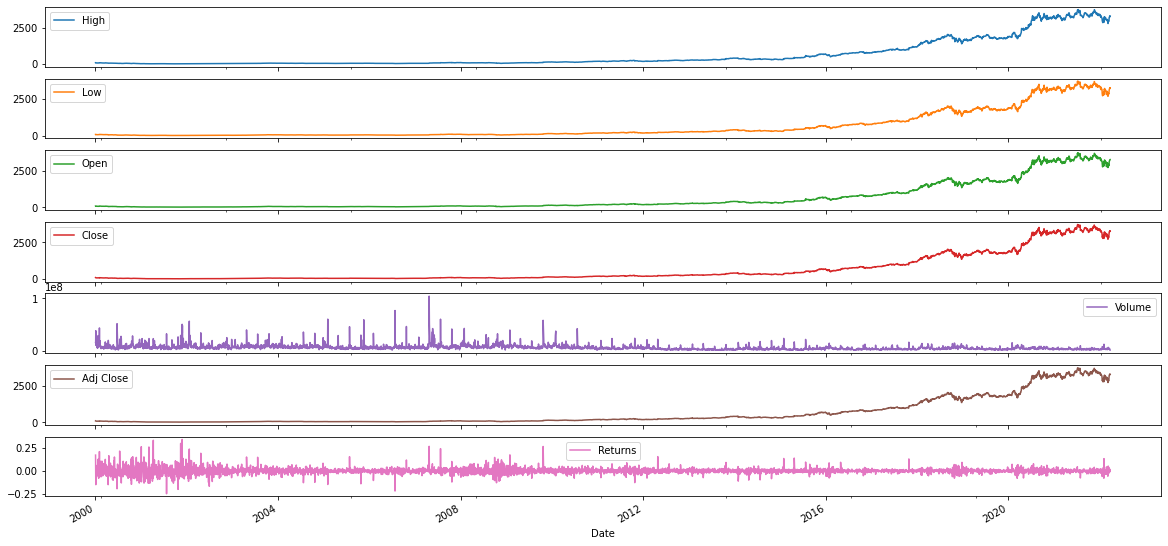

In [44]:
df['2000':'2022'].plot(subplots=True, figsize = (20,10))
plt.show()

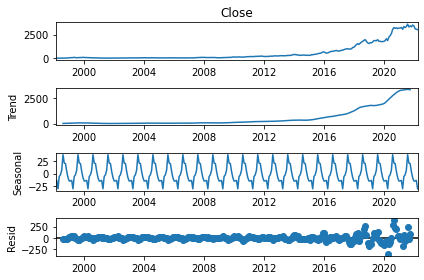

In [45]:
amzn_month = df.resample('M').mean()
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
decomposition = seasonal_decompose(amzn_month.Close, model='additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

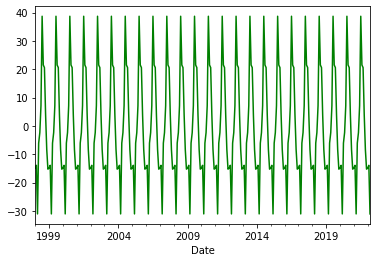

In [46]:
seasonality = decomposition.seasonal
seasonality.plot(color = 'green')

In [47]:
stat = adfuller(df['Returns'])
print('The p-value obtained from the Dickey-Fuller test is: ', stat[1])

The p-value obtained from the Dickey-Fuller test is:  1.2101950760963703e-24


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

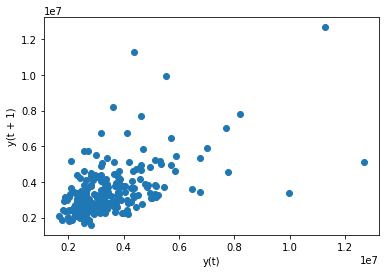

In [48]:
from pandas.plotting import lag_plot
lag_plot(df['Volume'].tail(250))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

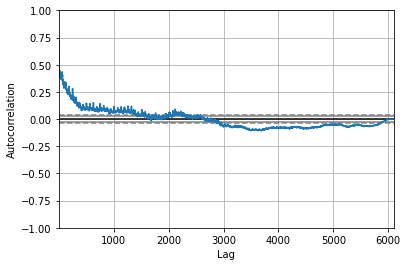

In [49]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Volume'])

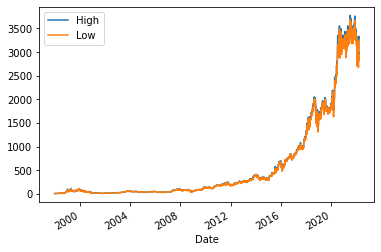

In [50]:
df.High.plot()
df.Low.plot()
plt.legend()
plt.show()

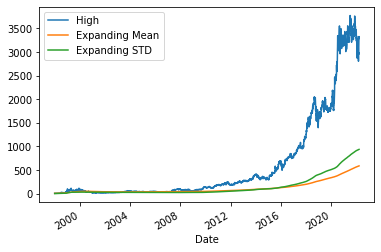

In [51]:
amzn_mean = df.High.expanding().mean()
amz_std = df.High.expanding().std()
df.High.plot()
amzn_mean.plot()
amz_std.plot()
plt.legend(['High', 'Expanding Mean', 'Expanding STD'])
plt.show()

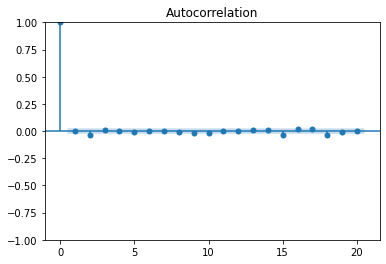

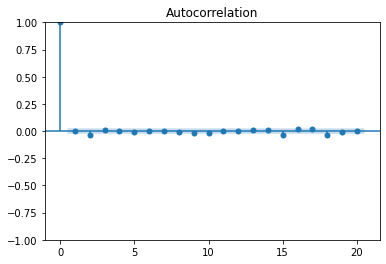

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Returns'], lags = 20)

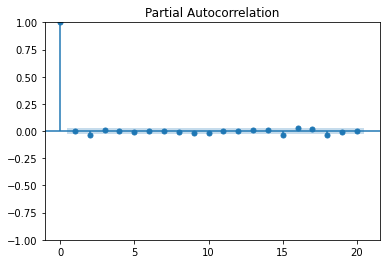

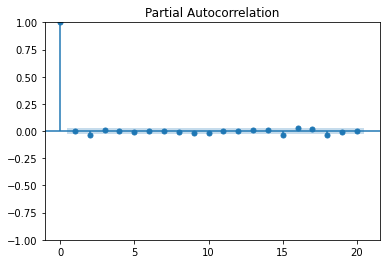

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Returns'], lags=20, method='ols')

In [54]:
from statsmodels.tsa.api import ARIMA
aic_vals = []
for i in range(3):
    model = ARIMA(df['Close'], order = (0,i,0))
    result = model.fit()
    aic_vals.append(result.aic)
    if i == 0:
        continue
        
    print('At order =', i-1, 'AIC value = ', aic_vals[i-1])

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


At order = 0 AIC value =  100610.33077194868
At order = 1 AIC value =  54672.485241497154


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [55]:
model = ARIMA(df['Close'], order = (0,1,0))
result = model.fit()
print(result.aic)
print(result.summary)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


54672.485241497154
<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x15b484580>>


In [56]:
model1 = ARIMA(df['Close'], order = (1,0,1))
result1 = model1.fit()
print(result1.aic)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


54691.40212048097


In [57]:
model2 = ARIMA(df['Close'], order = (1,1,2))
result2 = model2.fit()
print(result2.aic)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


54662.55345237546


In [58]:
model2 = ARIMA(df['Close'], order = (1,1,2))
result2 = model2.fit()
print(result2.aic)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


54662.55345237546


In [59]:
residuals = pd.DataFrame(result.resid)
residuals = residuals.iloc[1:]
residuals.describe()

,0
count,6097.000000
mean,0.537486
std,21.417769
min,-272.329834
25%,-1.570000
50%,0.049999
75%,2.125000
max,375.880127


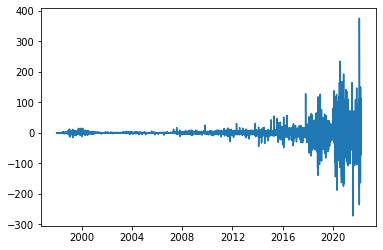

In [60]:
plt.plot(residuals)
plt.show()

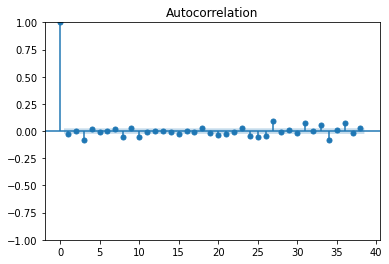

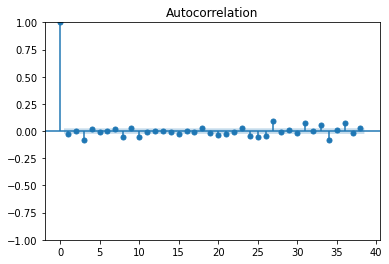

In [61]:
plot_acf(residuals)

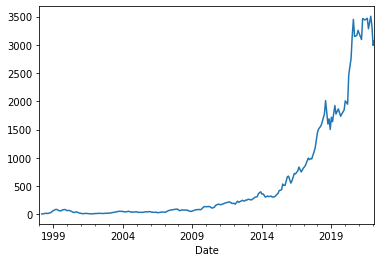

In [62]:
df['Close'].asfreq('M').interpolate().plot()
plt.show()

<AxesSubplot:xlabel='High', ylabel='Returns'>

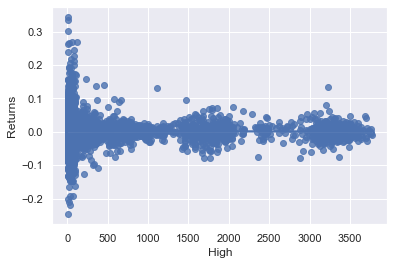

In [63]:
sns.set(color_codes = True)
sns.regplot(x = 'High', y = 'Returns', data = df)

In [64]:
df.corr()

,High,Low,Open,Close,Volume,Adj Close,Returns
High,1.000000,0.999886,0.999926,0.999915,-0.256047,0.999915,-0.008169
Low,0.999886,1.000000,0.999908,0.999916,-0.258525,0.999916,-0.008024
Open,0.999926,0.999908,1.000000,0.999820,-0.257262,0.999820,-0.010447
Close,0.999915,0.999916,0.999820,1.000000,-0.257276,1.000000,-0.005534
Volume,-0.256047,-0.258525,-0.257262,-0.257276,1.000000,-0.257276,0.169074
Adj Close,0.999915,0.999916,0.999820,1.000000,-0.257276,1.000000,-0.005534
Returns,-0.008169,-0.008024,-0.010447,-0.005534,0.169074,-0.005534,1.000000
